In [81]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california = fetch_california_housing()

# Convert to DataFrame for easier viewing
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

In [82]:
# Display basic information
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape (rows, columns): (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [83]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

In [84]:
print("\nFeature names:")
print(california.feature_names)


Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [85]:
print("\nDataset description:")
print(california.DESCR[:680])#First 680 character in description


Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None




In [86]:
X = california.data
y = california.target
# Calculate split indices based on dataset size
n_samples = X.shape[0]
train_end = int(0.6 * n_samples)  # 60% for training
test_end = int(0.8 * n_samples)   # Next 20% for testing
# Remaining 20% for validation

# Split data into train, test, and validation sets
X_train = X[:train_end]
y_train = y[:train_end]

X_test = X[train_end:test_end]
y_test = y[train_end:test_end]

X_val = X[test_end:]
y_val = y[test_end:]

print("Data split:")
print(f"Train: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")

# Normalize features using mean and std from training set
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

X_train_normalized = (X_train - X_mean) / X_std
X_test_normalized = (X_test - X_mean) / X_std
X_val_normalized = (X_val - X_mean) / X_std

print("X_train mean:", np.mean(X_train_normalized, axis=0))
print("X_train std:", np.std(X_train_normalized, axis=0))

Data split:
Train: 12384 samples
Test: 4128 samples
Validation: 4128 samples
X_train mean: [ 5.50808322e-17 -1.46882219e-16  2.20323329e-16  2.22618364e-16
 -9.18013870e-18  3.90155895e-17  1.67996538e-15 -9.05161676e-15]
X_train std: [1. 1. 1. 1. 1. 1. 1. 1.]


In [89]:
from scipy.spatial.distance import cdist
class RBFNetwork:

    def __init__(self, n_hidden, learning_rate=0.01):

        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        
        # These will be set during training
        self.centers = None      # RBF centers (n_hidden, n_features)
        self.sigmas = None       # RBF widths (n_hidden,)
        self.weights = None      # Output layer weights (n_hidden + 1,)
        
        print(f"RBF Network initialized with {n_hidden} hidden neurons")
        print(f"Learning rate: {learning_rate}")
    
    def gaussian_rbf(self, X, center, sigma):
        # Calculate Euclidean distance from center
        distances = np.linalg.norm(X - center, axis=1)
        # Apply Gaussian function
        activations = np.exp(-(distances ** 2) / (2 * sigma ** 2))
        return activations
        
    def kmeans(self, X, n_clusters, max_iter=100):
        # Randomly pick n_clusters samples as initial centers
        np.random.seed(42)
        idx = np.random.choice(X.shape[0], n_clusters, replace=False)
        centers = X[idx]
        
        for iteration in range(max_iter):
            # Assign each sample to the nearest center
            distances = cdist(X, centers)  # shape: (n_samples, n_clusters)
            labels = np.argmin(distances, axis=1)
            
            # Compute new centers
            new_centers = np.array([X[labels == k].mean(axis=0) 
                                   if np.any(labels == k) else centers[k]
                                   for k in range(n_clusters)])
            
            # Check convergence
            if np.allclose(centers, new_centers):
                print(f"K-Means converged at iteration {iteration}")
                break
            centers = new_centers
        
        return centers, labels
    
    def compute_sigmas(self, centers, labels, X):
        n_clusters = centers.shape[0]
        sigmas = np.zeros(n_clusters)
        
        for k in range(n_clusters):
            members = X[labels == k]
            if len(members) > 1:
                # Standard deviation of distances to center
                dists = np.linalg.norm(members - centers[k], axis=1)
                sigmas[k] = np.std(dists) + 1e-8  # Prevent zero sigma
            else:
                sigmas[k] = 1.0  # Default value
        
        return sigmas
    
    def compute_hidden_layer(self, X):
        n_samples = X.shape[0]
        H = np.zeros((n_samples, self.n_hidden))
        
        # Calculate activation for each RBF neuron
        for i in range(self.n_hidden):
            H[:, i] = self.gaussian_rbf(X, self.centers[i], self.sigmas[i])
        
        return H
    
    def fit(self, X, y):
        print("\nStarting RBF Network training...")
        
        # Step 1: Find centers using K-Means
        print("Step 1: Finding RBF centers with K-Means...")
        self.centers, labels = self.kmeans(X, self.n_hidden, max_iter=100)
        
        # Step 2: Compute sigmas
        print("Step 2: Computing sigmas...")
        self.sigmas = self.compute_sigmas(self.centers, labels, X)
        print(f"Sigma range: [{self.sigmas.min():.4f}, {self.sigmas.max():.4f}]")
        
        # Step 3: Compute hidden layer output
        print("Step 3: Computing hidden layer activations...")
        H = self.compute_hidden_layer(X)
        
        # Add bias term
        H_with_bias = np.c_[H, np.ones(H.shape[0])]
        
        # Step 4: Solve for output weights using pseudo-inverse
        print("Step 4: Solving for output weights...")
        self.weights = np.linalg.pinv(H_with_bias) @ y
        
        # Calculate training error
        y_pred = H_with_bias @ self.weights
        train_mse = np.mean((y - y_pred) ** 2)
        
        print(f"\nTraining completed!")
        print(f"Training MSE: {train_mse:.4f}")
        print(f"Weights shape: {self.weights.shape}")
    
    def predict(self, X):
        # Compute hidden layer activations
        H = self.compute_hidden_layer(X)
        
        # Add bias term
        H_with_bias = np.c_[H, np.ones(H.shape[0])]
        
        # Compute output
        y_pred = H_with_bias @ self.weights
        
        return y_pred
    
    def evaluate(self, X, y, dataset_name="Test"):
        # Make predictions
        y_pred = self.predict(X)
        
        # Calculate metrics
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))
        
        print(f"\n{dataset_name} Set Results:")
        print(f"MSE:  {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE:  {mae:.4f}")
        
        return mse, rmse
# Train the network
rbf = RBFNetwork(n_hidden=50, learning_rate=0.01)
rbf.fit(X_train_normalized, y_train)

# Evaluate on all datasets
print("RBF NETWORK EVALUATION")
rbf.evaluate(X_train_normalized, y_train, "Training")
rbf.evaluate(X_test_normalized, y_test, "Test")
rbf.evaluate(X_val_normalized, y_val, "Validation")


RBF Network initialized with 50 hidden neurons
Learning rate: 0.01

Starting RBF Network training...
Step 1: Finding RBF centers with K-Means...
K-Means converged at iteration 99
Step 2: Computing sigmas...
Sigma range: [0.0000, 4.1881]
Step 3: Computing hidden layer activations...
Step 4: Solving for output weights...

Training completed!
Training MSE: 0.9711
Weights shape: (51,)
RBF NETWORK EVALUATION

Training Set Results:
MSE:  0.9711
RMSE: 0.9855
MAE:  0.7460

Test Set Results:
MSE:  1.0696
RMSE: 1.0342
MAE:  0.8098

Validation Set Results:
MSE:  1.1389
RMSE: 1.0672
MAE:  0.8524


(1.1388575291867065, 1.0671726801163468)

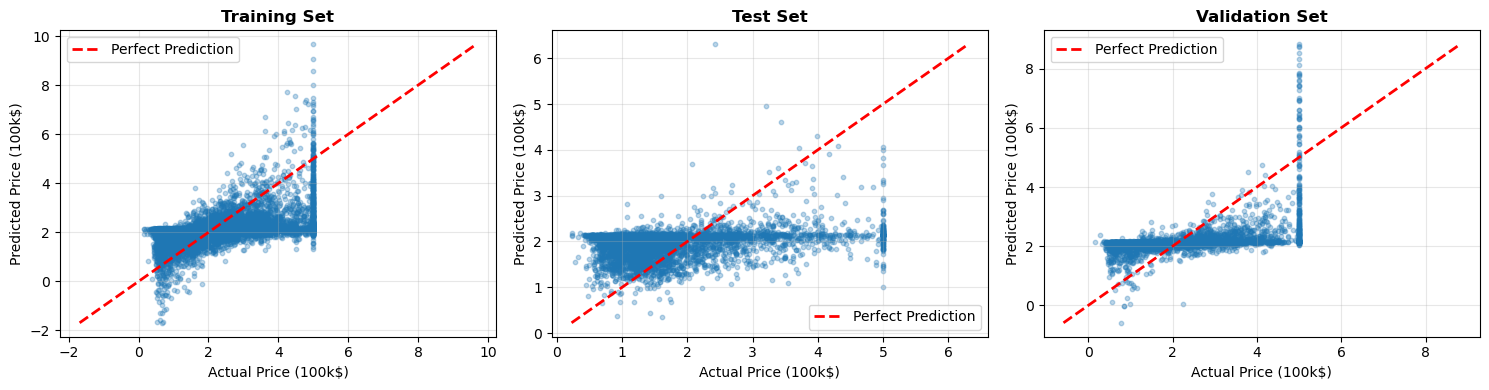

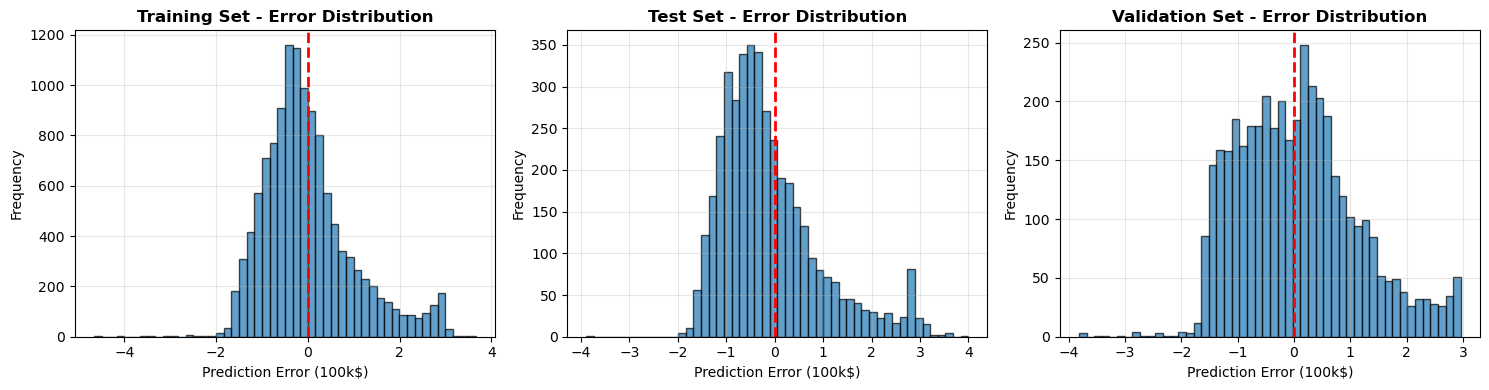

In [90]:
import matplotlib.pyplot as plt

# Visualization: Predicted vs Actual
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Predictions for all datasets
y_train_pred = rbf.predict(X_train_normalized)
y_test_pred = rbf.predict(X_test_normalized)
y_val_pred = rbf.predict(X_val_normalized)

datasets = [
    (y_train, y_train_pred, "Training Set"),
    (y_test, y_test_pred, "Test Set"),
    (y_val, y_val_pred, "Validation Set")
]

for idx, (y_true, y_pred, title) in enumerate(datasets):
    ax = axes[idx]
    
    # Scatter plot
    ax.scatter(y_true, y_pred, alpha=0.3, s=10)
    
    # Perfect prediction line (y=x)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Price (100k$)', fontsize=10)
    ax.set_ylabel('Predicted Price (100k$)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Error distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

errors = [
    (y_train - y_train_pred, "Training Set"),
    (y_test - y_test_pred, "Test Set"),
    (y_val - y_val_pred, "Validation Set")
]

for idx, (error, title) in enumerate(errors):
    ax = axes[idx]
    ax.hist(error, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Prediction Error (100k$)', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'{title} - Error Distribution', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
results = []

# Test different numbers of hidden neurons
hidden_neurons_list = [30, 50, 75, 100, 150]

for n_hidden in hidden_neurons_list:
    print(f"Testing with {n_hidden} hidden neurons")
    
    # Create and train network
    rbf_test = RBFNetwork(n_hidden=n_hidden, learning_rate=0.01)
    rbf_test.fit(X_train_normalized, y_train)
    
    # Evaluate on all sets
    train_mse, train_rmse = rbf_test.evaluate(X_train_normalized, y_train, "Training")
    test_mse, test_rmse = rbf_test.evaluate(X_test_normalized, y_test, "Test")
    val_mse, val_rmse = rbf_test.evaluate(X_val_normalized, y_val, "Validation")
    
    # Store results
    results.append({
        'n_hidden': n_hidden,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'val_mse': val_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'val_rmse': val_rmse
    })

# Display summary
print(f"{'Hidden Neurons':<15} {'Train MSE':<12} {'Test MSE':<12} {'Val MSE':<12}")

for r in results:
    print(f"{r['n_hidden']:<15} {r['train_mse']:<12.4f} {r['test_mse']:<12.4f} {r['val_mse']:<12.4f}")

# Find best configuration
best_config = min(results, key=lambda x: x['val_mse'])
print(f"BEST CONFIGURATION: {best_config['n_hidden']} hidden neurons")
print(f"Validation MSE: {best_config['val_mse']:.4f}")
print(f"Validation RMSE: {best_config['val_rmse']:.4f}")

Testing with 30 hidden neurons
RBF Network initialized with 30 hidden neurons
Learning rate: 0.01

Starting RBF Network training...
Step 1: Finding RBF centers with K-Means...
K-Means converged at iteration 99
Step 2: Computing sigmas...
Sigma range: [0.0000, 2.5000]
Step 3: Computing hidden layer activations...
Step 4: Solving for output weights...

Training completed!
Training MSE: 1.0426
Weights shape: (31,)

Training Set Results:
MSE:  1.0426
RMSE: 1.0211
MAE:  0.7702

Test Set Results:
MSE:  1.1635
RMSE: 1.0787
MAE:  0.8727

Validation Set Results:
MSE:  1.1157
RMSE: 1.0563
MAE:  0.8311
Testing with 50 hidden neurons
RBF Network initialized with 50 hidden neurons
Learning rate: 0.01

Starting RBF Network training...
Step 1: Finding RBF centers with K-Means...
K-Means converged at iteration 99
Step 2: Computing sigmas...
Sigma range: [0.0000, 4.1881]
Step 3: Computing hidden layer activations...
Step 4: Solving for output weights...

Training completed!
Training MSE: 0.9711
Weights

RBF Network initialized with 75 hidden neurons
Learning rate: 0.01

Starting RBF Network training...
Step 1: Finding RBF centers with K-Means...
K-Means converged at iteration 82
Step 2: Computing sigmas...
Sigma range: [0.0000, 4.1881]
Step 3: Computing hidden layer activations...
Step 4: Solving for output weights...

Training completed!
Training MSE: 0.9530
Weights shape: (76,)

Training Set Results:
MSE:  0.9530
RMSE: 0.9762
MAE:  0.7434

Test Set Results:
MSE:  1.0541
RMSE: 1.0267
MAE:  0.8043

Validation Set Results:
MSE:  1.1047
RMSE: 1.0511
MAE:  0.8484


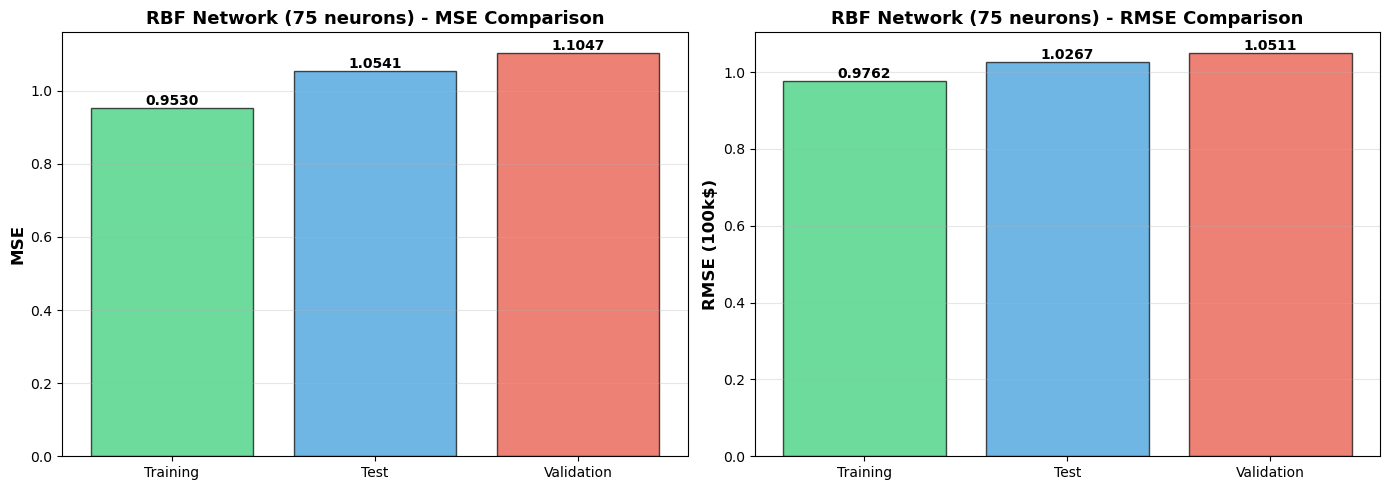

In [92]:
rbf_final = RBFNetwork(n_hidden=75, learning_rate=0.01)
rbf_final.fit(X_train_normalized, y_train)

train_mse, train_rmse = rbf_final.evaluate(X_train_normalized, y_train, "Training")
test_mse, test_rmse = rbf_final.evaluate(X_test_normalized, y_test, "Test")
val_mse, val_rmse = rbf_final.evaluate(X_val_normalized, y_val, "Validation")

# Visualization comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: MSE comparison across datasets
ax1 = axes[0]
datasets_names = ['Training', 'Test', 'Validation']
mse_values = [train_mse, test_mse, val_mse]
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = ax1.bar(datasets_names, mse_values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax1.set_title('RBF Network (75 neurons) - MSE Comparison', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, mse_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}',
             ha='center', va='bottom', fontweight='bold')

# Plot 2: RMSE comparison
ax2 = axes[1]
rmse_values = [train_rmse, test_rmse, val_rmse]

bars = ax2.bar(datasets_names, rmse_values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('RMSE (100k$)', fontsize=12, fontweight='bold')
ax2.set_title('RBF Network (75 neurons) - RMSE Comparison', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, rmse_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [93]:
class LoLiMoT:

    
    def __init__(self, max_neurons=50, min_samples_split=100):

        self.max_neurons = max_neurons
        self.min_samples_split = min_samples_split
        
        # Model parameters (will be set during training)
        self.local_models = []  # List of local linear models
        self.centers = []       # Centers of local regions
        self.sigmas = []        # Widths of validity functions
        self.split_dims = []    # Split dimension for each neuron
        self.split_vals = []    # Split value for each neuron
        
        print(f"LoLiMoT initialized with max {max_neurons} neurons")
        print(f"Minimum samples for split: {min_samples_split}")
    
    def fit_local_model(self, X, y):

        # Add bias term (column of ones)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Solve using pseudo-inverse
        weights = np.linalg.pinv(X_with_bias) @ y
        
        return weights
    
    def gaussian_validity(self, X, center, sigma):

        # Normalized squared distance
        normalized_dist = np.sum(((X - center) / sigma) ** 2, axis=1)
        
        # Gaussian validity function
        validity = np.exp(-0.5 * normalized_dist)
        
        return validity
    
    def find_best_split(self, X, y, indices):

        X_region = X[indices]
        y_region = y[indices]
        n_features = X.shape[1]
        
        best_mse = float('inf')
        best_dim = 0
        best_val = 0
        
        # Try splitting on each dimension
        for dim in range(n_features):
            # Try split at median of this dimension
            split_val = np.median(X_region[:, dim])
            
            # Split data
            left_mask = X_region[:, dim] <= split_val
            right_mask = ~left_mask
            
            # Need at least min_samples_split in each partition
            if np.sum(left_mask) < self.min_samples_split or \
               np.sum(right_mask) < self.min_samples_split:
                continue
            
            # Fit local models for each partition
            if np.sum(left_mask) > 0:
                w_left = self.fit_local_model(X_region[left_mask], y_region[left_mask])
                X_left_bias = np.c_[np.ones(np.sum(left_mask)), X_region[left_mask]]
                y_left_pred = X_left_bias @ w_left
                mse_left = np.mean((y_region[left_mask] - y_left_pred) ** 2)
            else:
                mse_left = 0
            
            if np.sum(right_mask) > 0:
                w_right = self.fit_local_model(X_region[right_mask], y_region[right_mask])
                X_right_bias = np.c_[np.ones(np.sum(right_mask)), X_region[right_mask]]
                y_right_pred = X_right_bias @ w_right
                mse_right = np.mean((y_region[right_mask] - y_right_pred) ** 2)
            else:
                mse_right = 0
            
            # Weighted average MSE
            total_mse = (np.sum(left_mask) * mse_left + np.sum(right_mask) * mse_right) / len(y_region)
            
            if total_mse < best_mse:
                best_mse = total_mse
                best_dim = dim
                best_val = split_val
        
        return best_dim, best_val, best_mse
    
    def fit(self, X, y):

        print("\nStarting LoLiMoT training...")
        n_samples, n_features = X.shape
        
        # Initialize with single global model
        print("Initializing with global linear model...")
        global_weights = self.fit_local_model(X, y)
        global_center = np.mean(X, axis=0)
        global_sigma = np.std(X, axis=0) + 1e-8
        
        self.local_models = [global_weights]
        self.centers = [global_center]
        self.sigmas = [global_sigma]
        self.split_dims = [None]
        self.split_vals = [None]
        
        # Calculate initial error
        X_bias = np.c_[np.ones(n_samples), X]
        y_pred = X_bias @ global_weights
        initial_mse = np.mean((y - y_pred) ** 2)
        print(f"Initial MSE: {initial_mse:.4f}")
        
        # Iteratively split regions
        for iteration in range(1, self.max_neurons):
            print(f"\nIteration {iteration}: {len(self.local_models)} local models")
            
            # Find worst performing region
            worst_idx = -1
            worst_mse = -1
            
            for idx in range(len(self.local_models)):
                indices = np.arange(n_samples)
                
                # Calculate error for this model
                X_bias = np.c_[np.ones(n_samples), X]
                y_pred = X_bias @ self.local_models[idx]
                errors = (y - y_pred) ** 2
                
                # Weight errors by validity
                validity = self.gaussian_validity(X, self.centers[idx], self.sigmas[idx])
                weighted_mse = np.sum(validity * errors) / np.sum(validity)
                
                if weighted_mse > worst_mse:
                    worst_mse = weighted_mse
                    worst_idx = idx
            
            print(f"Worst region: {worst_idx}, MSE: {worst_mse:.4f}")
            
            # Find best split for worst region
            indices = np.arange(n_samples)
            best_dim, best_val, split_mse = self.find_best_split(X, y, indices)
            
            # Check if split improves performance
            if worst_mse - split_mse < 0.001:
                print("No significant improvement, stopping...")
                break
            
            print(f"Splitting dimension {best_dim} at value {best_val:.4f}")
            
            # Create two new regions
            left_mask = X[:, best_dim] <= best_val
            right_mask = ~left_mask
            
            if np.sum(left_mask) < self.min_samples_split or \
               np.sum(right_mask) < self.min_samples_split:
                print("Not enough samples for split, stopping...")
                break
            
            # Fit models for new regions
            w_left = self.fit_local_model(X[left_mask], y[left_mask])
            w_right = self.fit_local_model(X[right_mask], y[right_mask])
            
            # Calculate centers and sigmas
            center_left = np.mean(X[left_mask], axis=0)
            sigma_left = np.std(X[left_mask], axis=0) + 1e-8
            
            center_right = np.mean(X[right_mask], axis=0)
            sigma_right = np.std(X[right_mask], axis=0) + 1e-8
            
            # Replace worst model with two new models
            self.local_models[worst_idx] = w_left
            self.centers[worst_idx] = center_left
            self.sigmas[worst_idx] = sigma_left
            self.split_dims[worst_idx] = best_dim
            self.split_vals[worst_idx] = best_val
            
            # Add second model
            self.local_models.append(w_right)
            self.centers.append(center_right)
            self.sigmas.append(sigma_right)
            self.split_dims.append(best_dim)
            self.split_vals.append(best_val)
            
            # Calculate current error
            y_pred = self.predict(X)
            current_mse = np.mean((y - y_pred) ** 2)
            print(f"Current MSE: {current_mse:.4f}")
        
        print(f"\nTraining completed with {len(self.local_models)} local models")
        final_mse = np.mean((y - self.predict(X)) ** 2)
        print(f"Final Training MSE: {final_mse:.4f}")
    
    def predict(self, X):

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        validity_sum = np.zeros(n_samples)
        
        # Weighted combination of all local models
        for idx in range(len(self.local_models)):
            validity = self.gaussian_validity(X, self.centers[idx], self.sigmas[idx])
            X_bias = np.c_[np.ones(n_samples), X]
            local_pred = X_bias @ self.local_models[idx]
            y_pred += validity * local_pred
            validity_sum += validity
        
        y_pred = y_pred / (validity_sum + 1e-8)
        return y_pred
    
    def evaluate(self, X, y, dataset_name="Test"):

        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))
        
        print(f"\n{dataset_name} Set Results:")
        print(f"MSE:  {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE:  {mae:.4f}")
        
        return mse, rmse

# Train LoLiMoT
lolimot = LoLiMoT(max_neurons=20, min_samples_split=200)
lolimot.fit(X_train_normalized, y_train)

# Evaluate
lolimot.evaluate(X_train_normalized, y_train, "Training")
lolimot.evaluate(X_test_normalized, y_test, "Test")
lolimot.evaluate(X_val_normalized, y_val, "Validation")


LoLiMoT initialized with max 20 neurons
Minimum samples for split: 200

Starting LoLiMoT training...
Initializing with global linear model...
Initial MSE: 0.5392

Iteration 1: 1 local models
Worst region: 0, MSE: 0.5608
Splitting dimension 5 at value -0.0343
Current MSE: 0.5605

Iteration 2: 2 local models
Worst region: 1, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.5314

Iteration 3: 3 local models
Worst region: 2, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.5168

Iteration 4: 4 local models
Worst region: 3, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.5077

Iteration 5: 5 local models
Worst region: 4, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.5013

Iteration 6: 6 local models
Worst region: 5, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.4966

Iteration 7: 7 local models
Worst region: 6, MSE: 0.6292
Splitting dimension 5 at value -0.0343
Current MSE: 0.4929

Iteration 8: 8 loc

(0.514148940873416, 0.717041798553903)

Model                     Train MSE    Test MSE     Val MSE     
RBF Network (75 neurons)  0.9530       1.0541       1.1047      
LoLiMoT (20 models)       0.4749       0.5412       0.5141      

 LoLiMoT improvement over RBF: 53.5%


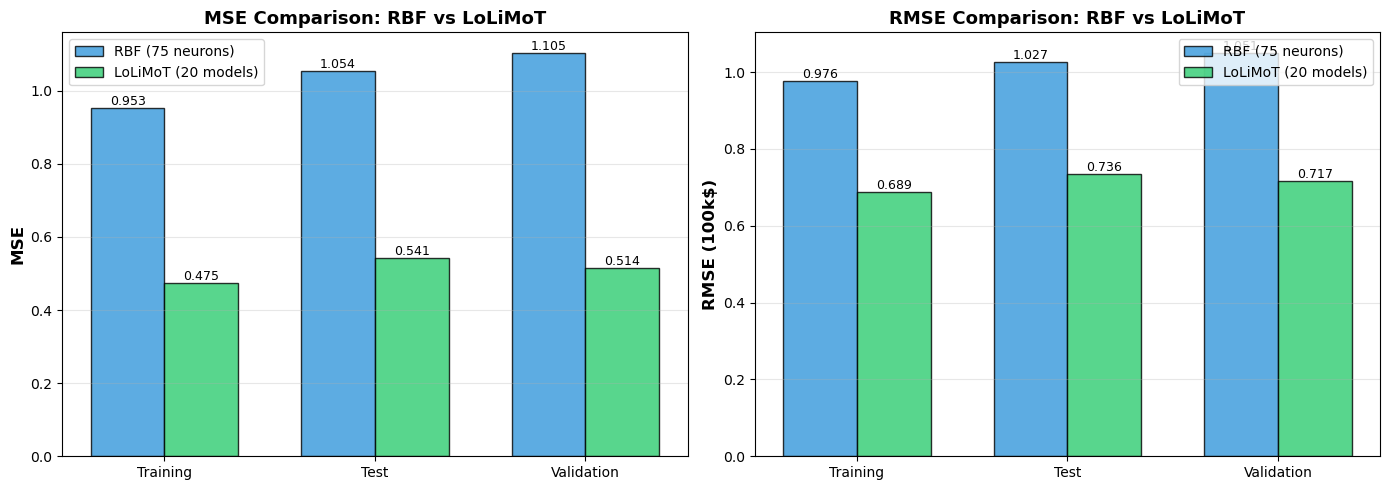

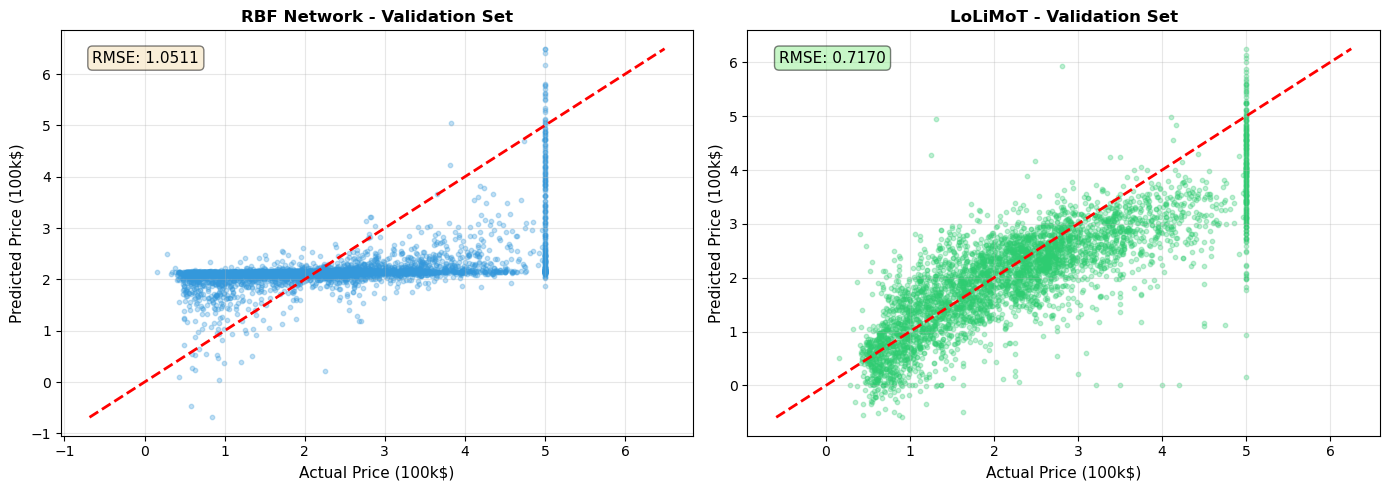

In [94]:
# Results summary
results_comparison = {
    'RBF Network (75 neurons)': {
        'train_mse': 0.9530,
        'test_mse': 1.0541,
        'val_mse': 1.1047,
        'train_rmse': 0.9762,
        'test_rmse': 1.0267,
        'val_rmse': 1.0511
    },
    'LoLiMoT (20 models)': {
        'train_mse': 0.4749,
        'test_mse': 0.5412,
        'val_mse': 0.5141,
        'train_rmse': 0.6892,
        'test_rmse': 0.7356,
        'val_rmse': 0.7170
    }
}

# Print comparison table
print(f"{'Model':<25} {'Train MSE':<12} {'Test MSE':<12} {'Val MSE':<12}")
for model, metrics in results_comparison.items():
    print(f"{model:<25} {metrics['train_mse']:<12.4f} {metrics['test_mse']:<12.4f} {metrics['val_mse']:<12.4f}")

# Calculate improvement
rbf_val_mse = 1.1047
lolimot_val_mse = 0.5141
improvement = ((rbf_val_mse - lolimot_val_mse) / rbf_val_mse) * 100

print(f"\n LoLiMoT improvement over RBF: {improvement:.1f}%")


# Visualization: Bar chart comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: MSE comparison
ax1 = axes[0]
datasets = ['Training', 'Test', 'Validation']
rbf_mse = [0.9530, 1.0541, 1.1047]
lolimot_mse = [0.4749, 0.5412, 0.5141]

x = np.arange(len(datasets))
width = 0.35

bars1 = ax1.bar(x - width/2, rbf_mse, width, label='RBF (75 neurons)', 
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, lolimot_mse, width, label='LoLiMoT (20 models)', 
                color='#2ecc71', alpha=0.8, edgecolor='black')

ax1.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax1.set_title('MSE Comparison: RBF vs LoLiMoT', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

# Plot 2: RMSE comparison
ax2 = axes[1]
rbf_rmse = [0.9762, 1.0267, 1.0511]
lolimot_rmse = [0.6892, 0.7356, 0.7170]

bars1 = ax2.bar(x - width/2, rbf_rmse, width, label='RBF (75 neurons)', 
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, lolimot_rmse, width, label='LoLiMoT (20 models)', 
                color='#2ecc71', alpha=0.8, edgecolor='black')

ax2.set_ylabel('RMSE (100k$)', fontsize=12, fontweight='bold')
ax2.set_title('RMSE Comparison: RBF vs LoLiMoT', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Scatter plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RBF predictions
y_val_pred_rbf = rbf_final.predict(X_val_normalized)

# LoLiMoT predictions
y_val_pred_lolimot = lolimot.predict(X_val_normalized)

# Plot RBF
ax1 = axes[0]
ax1.scatter(y_val, y_val_pred_rbf, alpha=0.3, s=10, color='#3498db')
min_val = min(y_val.min(), y_val_pred_rbf.min())
max_val = max(y_val.max(), y_val_pred_rbf.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_xlabel('Actual Price (100k$)', fontsize=11)
ax1.set_ylabel('Predicted Price (100k$)', fontsize=11)
ax1.set_title('RBF Network - Validation Set', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.text(0.05, 0.95, f'RMSE: {1.0511:.4f}', transform=ax1.transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot LoLiMoT
ax2 = axes[1]
ax2.scatter(y_val, y_val_pred_lolimot, alpha=0.3, s=10, color='#2ecc71')
min_val = min(y_val.min(), y_val_pred_lolimot.min())
max_val = max(y_val.max(), y_val_pred_lolimot.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax2.set_xlabel('Actual Price (100k$)', fontsize=11)
ax2.set_ylabel('Predicted Price (100k$)', fontsize=11)
ax2.set_title('LoLiMoT - Validation Set', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'RMSE: {0.7170:.4f}', transform=ax2.transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()